# Instalação e setup

[![](https://img.shields.io/badge/PyPi-ffffff?style=for-the-badge&logo=pypi)](https://pypi.org/)

- jupyter 1.0.0 - /project/jupyter/
- scikit-learn 1.0.1 - /project/scikit-learn/
- matplotlib 3.5.0 - /project/matplotlib/
- pandas 1.3.4 - /project/pandas/
- scipy 1.7.3 - /project/scipy/

# DBSCAN

## Considerações

`eps` - Raio da circunferência à volta de um ponto que representa a sua vizinhança

`MinPts` - Número mínimo de pontos que queremos ver na vizinhança de um ponto

Ponto **core**
- Número de vizinhos &ge; MinPts

Ponto **boundary**
- Número de vizinhos < MinPts
- Deve estar na vizinhança de um ponto **core**

Ponto **noise**
- Não é ponto **core** nem **boundary**

Aresta de densidade - Une dois pontos **core** que sejam vizinhos

Pontos conectados por densidade - Diz-se que dois pontos **core** _p_ e _q_ estão conectados por densidade, caso estejam conectados através de arestas de densidade

## Algoritmo

1. Classificar os pontos como **core**, **boundary** ou **noise**

![Diagrama](./files/dbscan1_core.png)

![Diagrama](./files/dbscan1_boundary.png)

![Diagrama](./files/dbscan1_noise.png)

2. Descartar os pontos **noise**

![Diagrama](./files/dbscan2.png)

3. Atribuir um cluster a um ponto **core**

![Diagrama](./files/dbscan3.png)

4. Colorir todos os pontos conectados por densidade desse ponto **core**

![Diagrama](./files/dbscan4.png)

5. Repetir os passos 3 e 4 para os restantes pontos **core**

![Diagrama](./files/dbscan5.png)

6. Colorir os pontos **boundary** de acordo com o ponto **core** mais próximo

![Diagrama](./files/dbscan6.png)

## Implementação em Python

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from pandas import DataFrame

In [2]:
X, _ = make_blobs(n_samples = 500, centers = 3, random_state = 20)

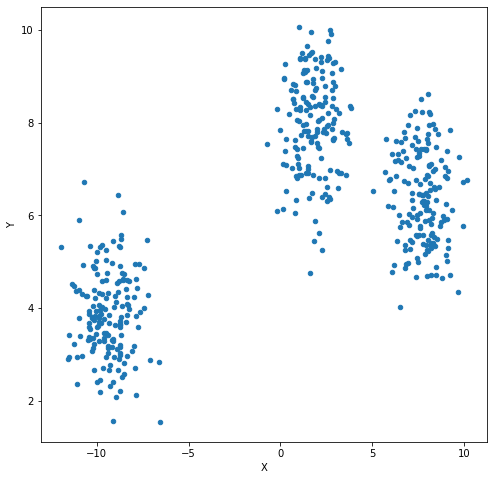

In [3]:
df = DataFrame(dict(x=X[:,0], y=X[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax = ax, kind = "scatter", x = "x", y = "y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [4]:
dbscan = DBSCAN(eps = 1, min_samples = 5).fit(X)
clusters = dbscan.labels_

In [5]:
len(set(clusters))

4

In [6]:
def show_clusters(X, cluster):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {-1: "red", 0: "blue", 1: "orange", 2: "green"}
    fig, ax = plt.subplots(figsize = (8,8))
    grouped = df.groupby("label")
    for key, group in grouped:
        group.plot(ax = ax, kind = "scatter", x = "x", y = "y", label = key, color = colors[key])
    plt.xlabel("X")
    plt.ylabel("Y")

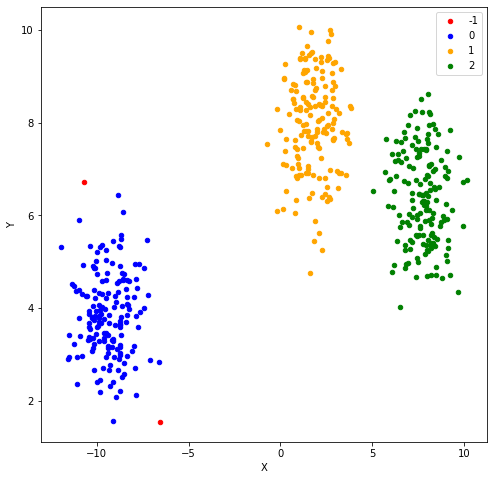

In [7]:
show_clusters(X, clusters)

# KMeans

## Considerações

Método elbow - Utiliza-se para determinar o número ótimo de clusters (_k_). Neste método, para cada _k_ de um certo intervalo de valores, calcula-se a soma dos quadrados das distâncias entre cada ponto e o centróide mais próximo. O valor ótimo de _k_ será aquele a partir do qual a soma dos quadrados das distâncias deixa de variar significativamente.

## Algoritmo

1. Escolher o número de clusters _k_

![Diagrama](./files/kmeans1.png)

2. Selecionar _k_ pontos aleatórios como centróides

![Diagrama](./files/kmeans2.png)

3. Atribuir cada ponto ao cluster cujo centróide se encontra mais próximo

![Diagrama](./files/kmeans3.png)

4. Calcular a média de cada cluster como o novo centróide

![Diagrama](./files/kmeans4.png)

5. Repetir os passos 3 e 4

![Diagrama](./files/kmeans5.png)

![Diagrama](./files/kmeans6.png)

## Implementação em Python

In [8]:
from sklearn.cluster import KMeans

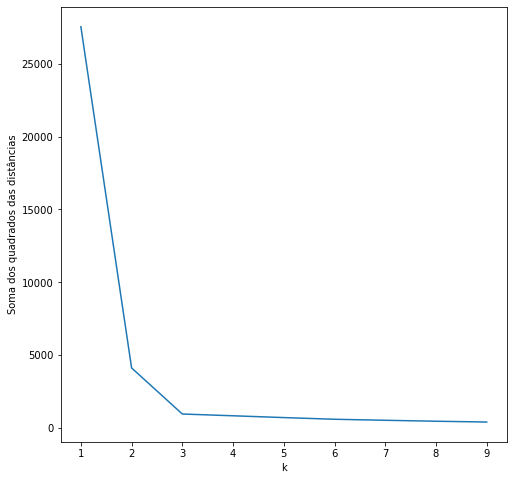

In [9]:
sum_of_squared_distances = []
k = range(1,10)
for num_clusters in k:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(k, sum_of_squared_distances)
plt.xlabel("k") 
plt.ylabel("Soma dos quadrados das distâncias")
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3).fit(X)
clusters = kmeans.labels_

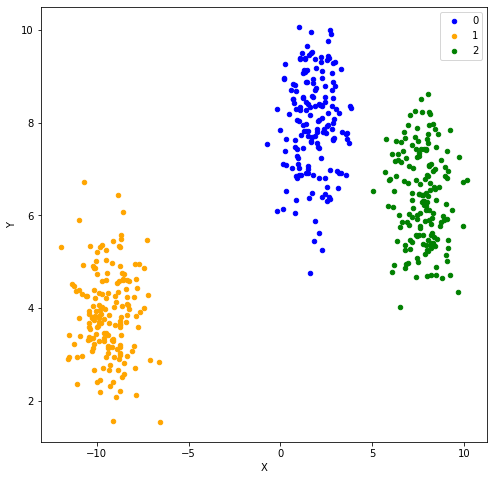

In [11]:
show_clusters(X, clusters)

# Hierarchical Clustering

## Considerações

Métodos de ligação:
- Método de ligação única - A distância entre dois clusters é a distância mínima entre os membros dos dois clusters
- Método de ligação completa - A distância entre dois clusters é a distância máxima entre os membros dos dois clusters
- Método de ligação média entre grupos - A distância entre dois clusters é a média aritmética simples de todas as distâncias entre os membros dos dois clusters
- Método de ligação média entre grupos equilibrada - A distância entre dois clusters é a média aritmética ponderada de todas as distâncias entre os membros dos dois clusters
- Método centróide - A distância entre dois clusters é a distância entre os seus centróides
- Método mediano - A distância entre dois clusters é a mediana de todas as distâncias entre os membros dos dois clusters
- Método de Ward - A distância entre dois clusters é a variância total do resultado da união dos mesmos

Dendrograma - Um dendrograma é um diagrama semelhante a uma árvore que regista as uniões de clusters em cada iteração. No eixo do X encontra-se o identificador de cada observação e no eixo do Y encontra-se a distância. Sempre que dois clusters se unirem, a altura da união corresponderá à distância entre os mesmos. Utiliza-se para determinar o número ótimo de clusters.

## Algoritmo

1. Atribuir todos os pontos a um cluster individual

![Diagrama](./files/hc1.png)

2. Unir os clusters com a menor distância na matriz de proximidade

![Diagrama](./files/hc2.png)

3. Repetir o passo 2 até restar um único cluster

![Diagrama](./files/hc3.png)

![Diagrama](./files/hc4.png)

## Implementação em Python

In [12]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

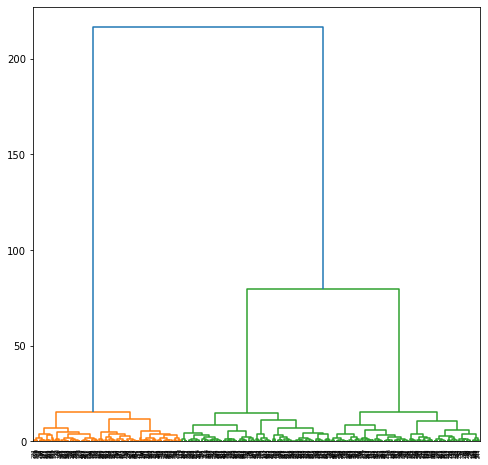

In [13]:
Z = hierarchy.linkage(X, method="ward")

fig, ax = plt.subplots(figsize=(8,8))
dendrogram = hierarchy.dendrogram(Z)

In [14]:
hc = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X)
clusters = hc.labels_

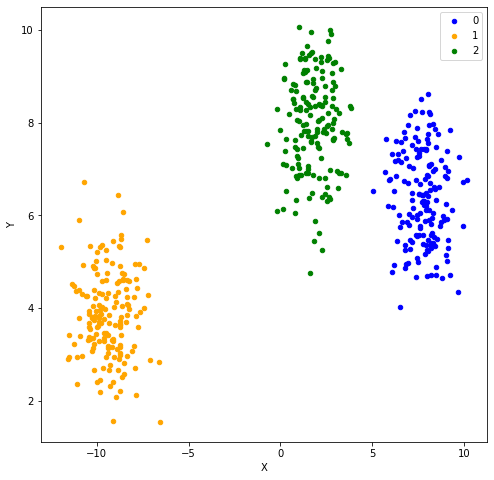

In [15]:
show_clusters(X, clusters)